# Aplicación del procesamiento de señales en el mundo real

In [1]:
from modules.read_data import *
from modules.transform_data import *
from modules.plot_data import *
from modules.ml_functions import *

## Importar Metadatos

In [2]:
metadata_path = get_metadata_path()
train_metadata_df, test_metadata_df = load_metadata(metadata_path)
print('Total records in metadata train set: {}'.format(len(train_metadata_df)))
print('Total records in metadata test set: {}'.format(len(test_metadata_df)))

Total records in metadata train set: 386
Total records in metadata test set: 166


## Importar Señales

Para este apartado se tiene en cuenta que la orientación "Las señales tienen distintas duraciones. Sin embargo, no hay ninguna señal de más de 90 minutos ni de menos de 30 minutos." no se cumple debido a que hay señales que presentan mas de los 90 minutos especificados. Se opta por limitar las señales a los últimos 30 minutos entregados por las mediciones.

In [3]:
signal_path_train, signal_path_test = get_signal_path()
signal_train = load_signal(signal_path_train)
signal_test = load_signal(signal_path_test)
print('Total records in signal train set: {}'.format(len(signal_train)))
print('Total records in signal test set: {}'.format(len(signal_test)))

Total records in signal train set: 386
Total records in signal test set: 166


## Análisis Explotatorio de los datos

Se llevará a cabo un análisis exploratorio de datos (EDA) para obtener una visualización detallada de la composición y distribución del dataset. Esto incluirá la revisión de las primeras filas del dataset, la generación de estadísticas descriptivas, la identificación de tipos de datos, la verificación de valores nulos y la representación gráfica de las variables principales para comprender mejor su comportamiento y relaciones.

Se visualizan las 5 primeras columnas del dataset para observar su composición.

In [4]:
train_metadata_df.head()

,recordID,babyhealth,gestweeks,sex,age,gravidity,parity,diabetes,hypertension,preeclampsia,pyrexia,meconium,noprogress,rectype
0,5086,1,38.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5491,0,40.0,1.0,32.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0
2,5097,0,41.0,1.0,29.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5108,1,39.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5264,0,39.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Se imprime información general del dataset, en este caso se relaciona la columna con el conteo del total de registros no nulos y el tipo de dato asignado a dicha columna.

In [5]:
train_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recordID      386 non-null    int64  
 1   babyhealth    386 non-null    int64  
 2   gestweeks     386 non-null    float64
 3   sex           386 non-null    float64
 4   age           386 non-null    float64
 5   gravidity     384 non-null    float64
 6   parity        386 non-null    float64
 7   diabetes      386 non-null    float64
 8   hypertension  386 non-null    float64
 9   preeclampsia  386 non-null    float64
 10  pyrexia       386 non-null    float64
 11  meconium      386 non-null    float64
 12  noprogress    386 non-null    float64
 13  rectype       384 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 42.3 KB


Se puede observar que las columnas _*gravidity*_ y _*rectype*_ presentan valores nulos en ciertos registros. Teniendo en cuenta que la porción de datos que presenta pérdida de información es relativamente baja (Representa el 0.51% de los datos) se dropearan dichos valores del dataset para tener un total de 383 registros sin valores no nulos.

In [6]:
train_metadata_df_cleaned = train_metadata_df.dropna(subset=['gravidity', 'rectype'])
train_metadata_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 0 to 385
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recordID      383 non-null    int64  
 1   babyhealth    383 non-null    int64  
 2   gestweeks     383 non-null    float64
 3   sex           383 non-null    float64
 4   age           383 non-null    float64
 5   gravidity     383 non-null    float64
 6   parity        383 non-null    float64
 7   diabetes      383 non-null    float64
 8   hypertension  383 non-null    float64
 9   preeclampsia  383 non-null    float64
 10  pyrexia       383 non-null    float64
 11  meconium      383 non-null    float64
 12  noprogress    383 non-null    float64
 13  rectype       383 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 44.9 KB


Por otro lado, se debe realizar la transformación de las variables debido a que al importar el conjunto de datos se asigna automáticamente su tipo y para algunas columas que son categóricas se obtienen tipo float64 (Esto solo se realizará para el EDA, para el entrenamiento de modelos ML se usarán columnas de tipo dummy).

In [7]:
train_metadata_df_cleaned_transformed = columns_to_categorical(train_metadata_df_cleaned, 'Train')
train_metadata_df_cleaned_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 0 to 385
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recordID      383 non-null    int64  
 1   babyhealth    383 non-null    object 
 2   gestweeks     383 non-null    float64
 3   sex           383 non-null    object 
 4   age           383 non-null    float64
 5   gravidity     383 non-null    float64
 6   parity        383 non-null    float64
 7   diabetes      383 non-null    object 
 8   hypertension  383 non-null    object 
 9   preeclampsia  383 non-null    object 
 10  pyrexia       383 non-null    object 
 11  meconium      383 non-null    object 
 12  noprogress    383 non-null    object 
 13  rectype       383 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 44.9+ KB


Obteniendo métricas de interés sobre variables de tipo numérico.

In [8]:
train_metadata_df_cleaned_transformed.describe()

,recordID,gestweeks,age,gravidity,parity
count,383.000000,383.000000,383.000000,383.000000,383.000000
mean,5274.409922,39.934726,29.697128,1.456919,0.420366
std,160.564031,1.177192,4.593094,1.029714,0.788200
min,5002.000000,37.000000,18.000000,1.000000,0.000000
25%,5138.500000,39.000000,27.000000,1.000000,0.000000
50%,5269.000000,40.000000,30.000000,1.000000,0.000000
75%,5414.500000,41.000000,33.000000,1.000000,1.000000
max,5552.000000,43.000000,42.000000,8.000000,7.000000


Para obtener un análisis mas profundo del comportamiento de las variables dependientes respecto a la indepediente se realizan los gráficos de caja y bigotes. De esta manera, se puede observar e identificar distribuciones y características importantes.

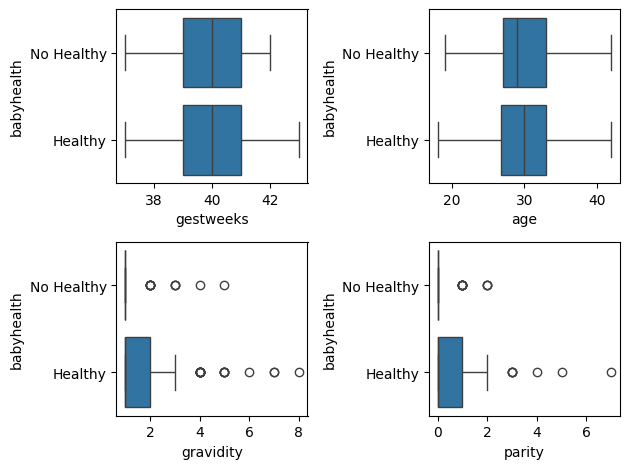

In [9]:
boxploter(train_metadata_df_cleaned_transformed)

* Analizando *gestweeks* y *age* se encuentran distribuciones sin datos atípicos (Outliers) y casi simétricas respecto a *babyhealth*. En cuanto a *gestweeks* la asimetría en el bigote de la clase *No Healthy* nos indica que hay variabilidad en los datos hacia el costado derecho de la mediana. Por otro lado, en cuanto a *age* se observa el desplazamiento de la mediana hacia el costado izquierdo de la caja en la clase *No Healthy* nos indica que la mayor parte de los datos está contenido en los valores inferiores a la mediana.
* Anaizando *gravidity* y *parity* se encuentran valores atípicos (Indicados como puntos). Para ambas características se tienen la mayoria de datos concentrados en las clase bajas (1 y 2 para *gravidity* y 0 y 1 para *parity*).

Análisis sobre variables de tipo categórico.

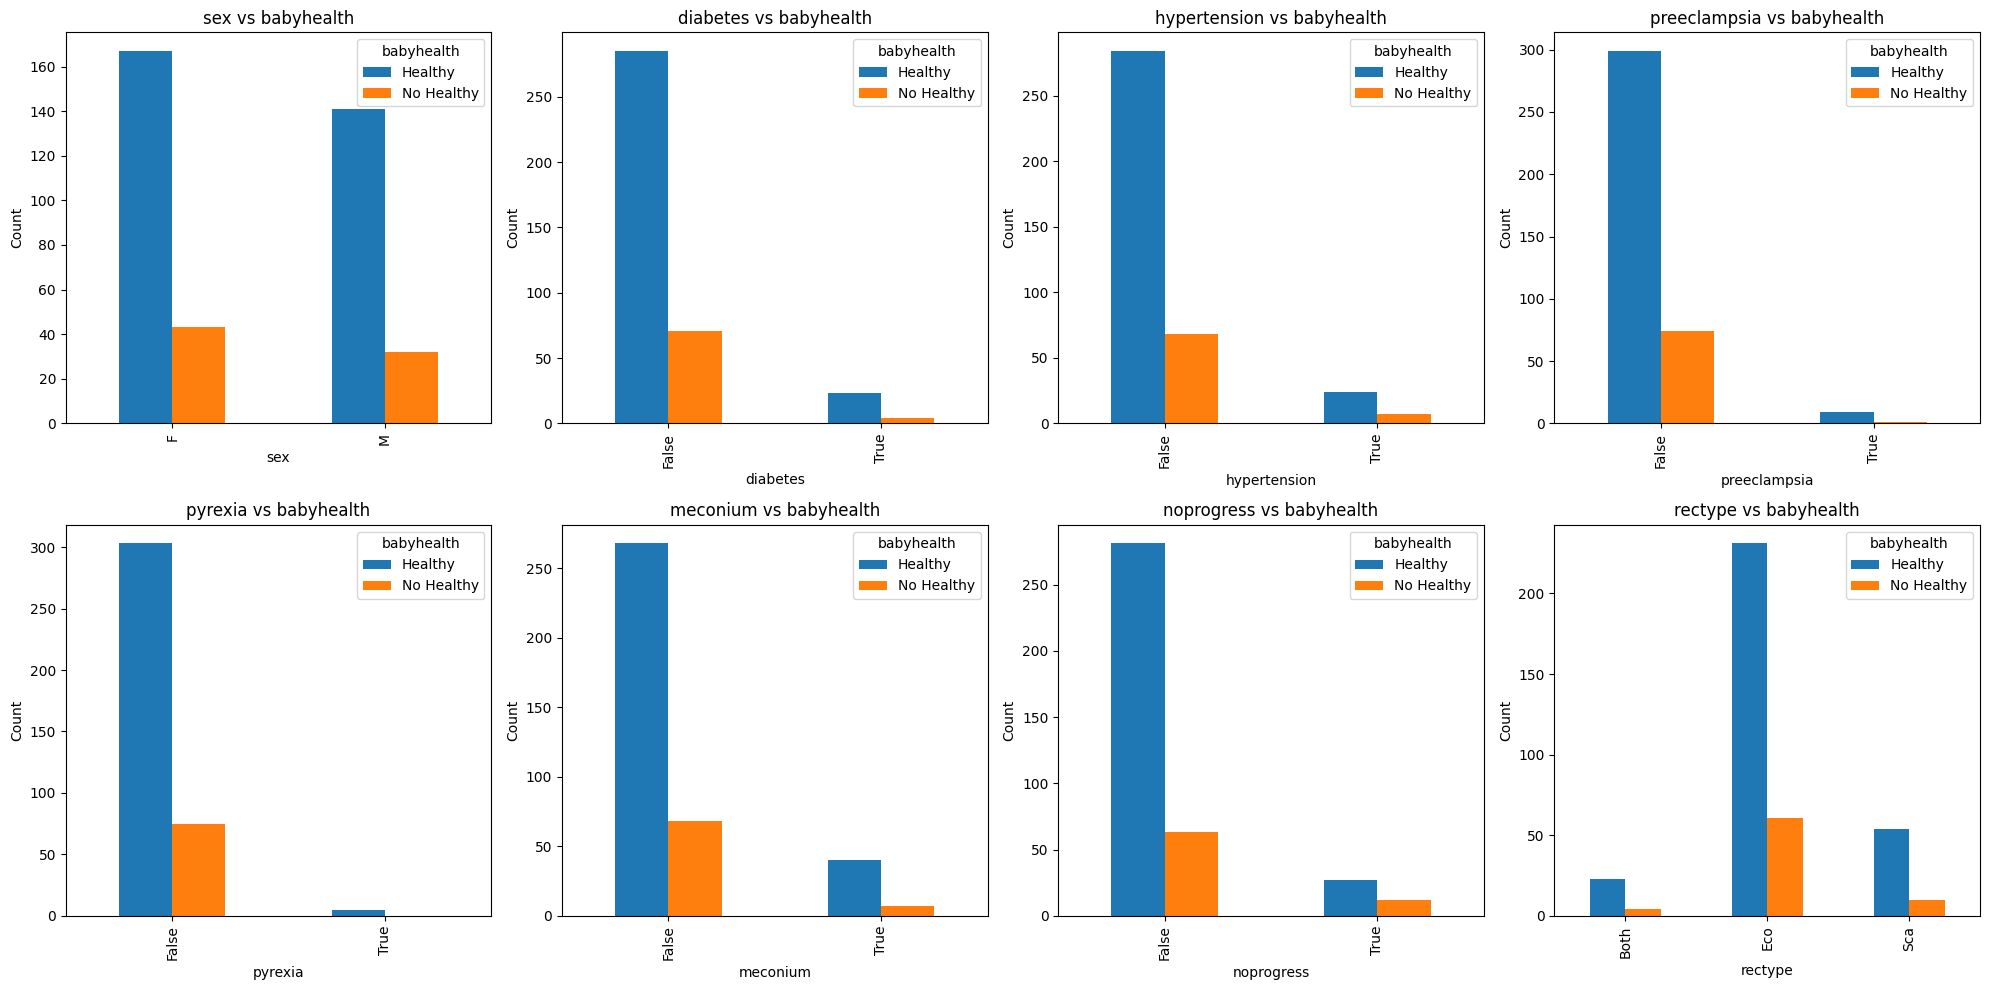

In [10]:
bar_plot(train_metadata_df_cleaned_transformed)

En la figura anterior se puede observar la cantidad de bebés saludables y no saludables después del parto según características definidas tales como sexo, diabetes, hipertensión, etc.

## Construcción y preprocesamiento del conjunto de datos de entrenamiento

Teniendo en cuenta que el conjunto original de testeo no contiene la variable objetivo *babyhealth* este conjunto de datos no será productivo en búsqueda de entrenamientos de algoritmos de ML. Por otro lado, se plateará un nuevo uso ligado a predicciones simulando un conjunto de datos real.

Debido a que los metadatos y las señales están en sets de datos diferentes se debe preprocesar los datos para obtener un conjunto de datos completo y limpio para aplicar técnicas de ML sobre este mismo.

In [11]:
final_dataframe = merge_data(train_metadata_df_cleaned, signal_train).drop('recordID',axis=1)
final_dataframe

,babyhealth,gestweeks,sex,age,gravidity,parity,diabetes,hypertension,preeclampsia,pyrexia,...,std_fhr,min_val_fhr,error_in_min_fhr,max_val_fhr,mean_uc,median_uc,std_uc,min_val_uc,error_in_min_uc,max_val_uc
0,1,38.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,...,39.988697,0.0,1,239.00,19.421111,19.5,0.188316,19.0,0,20.0
1,0,40.0,1.0,32.0,1.0,1.0,1.0,0.0,0.0,0.0,...,5.448121,102.5,0,150.75,72.782222,84.0,28.306889,0.0,1,100.0
2,0,41.0,1.0,29.0,2.0,0.0,0.0,0.0,0.0,0.0,...,53.275581,0.0,1,231.00,31.120000,39.0,23.367215,0.0,1,88.0
3,1,39.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,...,26.888703,0.0,1,164.00,40.131667,41.0,38.536728,0.0,1,100.0
4,0,39.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,0.0,...,67.759507,0.0,1,193.50,13.112222,1.5,24.490861,0.0,1,105.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0,40.0,2.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,...,78.507365,0.0,1,191.50,1.033889,1.5,0.655898,0.0,1,1.5
382,1,40.0,2.0,28.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,1,0.00,0.000000,0.0,0.000000,0.0,1,0.0
383,0,40.0,1.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,...,47.723045,0.0,1,182.00,5.449167,1.5,8.837914,0.0,1,43.0
384,0,39.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,...,29.255093,0.0,1,153.00,9.523333,0.0,12.242569,0.0,1,46.0


Para realizar entrenamiento y validación de los algoritmos es necesario separar el conjunto final de datos obtenido en muestras de entramiento y validación realizando un split 80% y 20% respectivamente.

In [12]:
X, Y = final_dataframe.drop('babyhealth',axis=1), final_dataframe['babyhealth']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print('Total records in signal X_train set: {}'.format(len(X_train)))
print('Total records in signal X_test set: {}'.format(len(X_test)))
print('Total records in signal Y_train set: {}'.format(len(y_train)))
print('Total records in signal Y_test set: {}'.format(len(y_test)))

Total records in signal X_train set: 306
Total records in signal X_test set: 77
Total records in signal Y_train set: 306
Total records in signal Y_test set: 77


Es imperativo que para las variables de tipo categórico se realice un proceso de codificación para poder trabajar los algoritmos de ML.

In [13]:
X_train_coded = pd.get_dummies(X_train, columns=['sex', 'diabetes', 'hypertension', 'preeclampsia', 'pyrexia', 'meconium', 'noprogress', 'rectype', 'error_in_min_fhr', 'error_in_min_uc'])
X_test_coded = pd.get_dummies(X_test, columns=['sex', 'diabetes', 'hypertension', 'preeclampsia', 'pyrexia', 'meconium', 'noprogress', 'rectype', 'error_in_min_fhr', 'error_in_min_uc'])

In [14]:
X_train_coded.shape

(306, 35)

In [15]:
X_test_coded.shape

(77, 35)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_coded)
X_test_scaled = scaler.transform(X_test_coded)

Esto es útil porque muchos algoritmos de aprendizaje automático no pueden trabajar directamente con variables categóricas y requieren que todas las variables sean numéricas. La codificación one-hot permite representar las variables categóricas de una manera que el algoritmo pueda entender. Mediante esta transformación se pueden calcular correlaciones entre las variables.

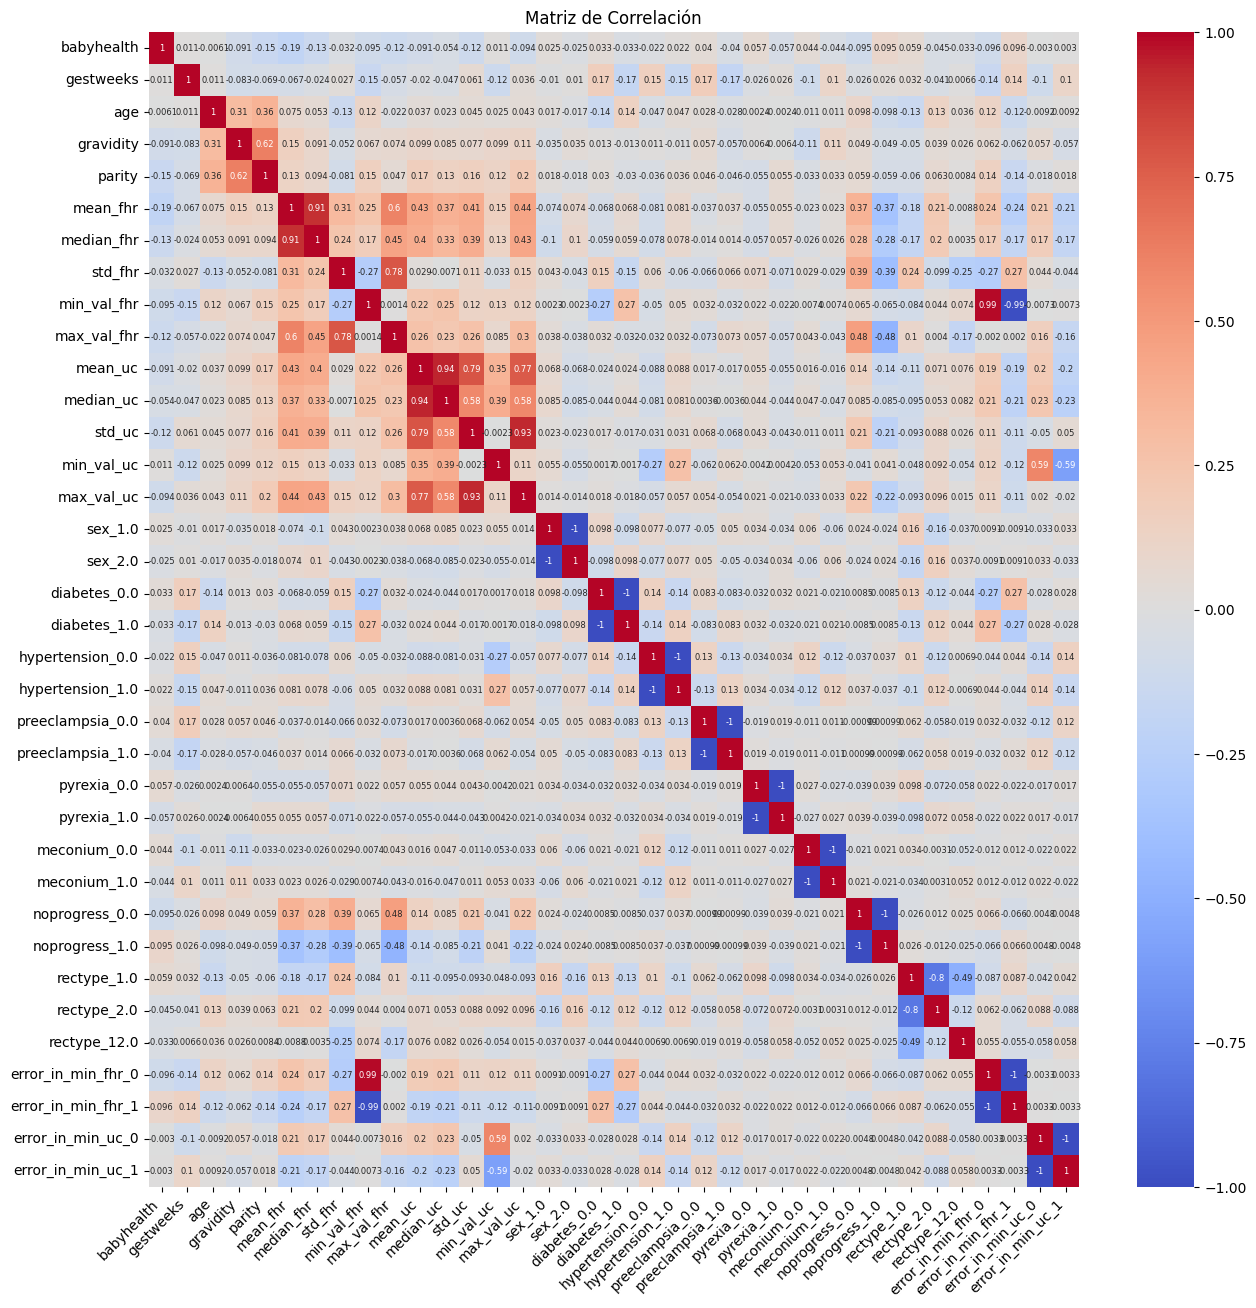

In [17]:
correlation_plot(pd.get_dummies(final_dataframe, columns=['sex', 'diabetes', 'hypertension', 'preeclampsia', 'pyrexia', 'meconium', 'noprogress', 'rectype', 'error_in_min_fhr', 'error_in_min_uc']))

## Creación de modelos

### Regresión logística

In [18]:
LogisticRegressionModel = LogisticRegression(C=10).fit(X_train_scaled, y_train)

In [19]:
y_predict_lr = LogisticRegressionModel.predict(X_test_scaled)

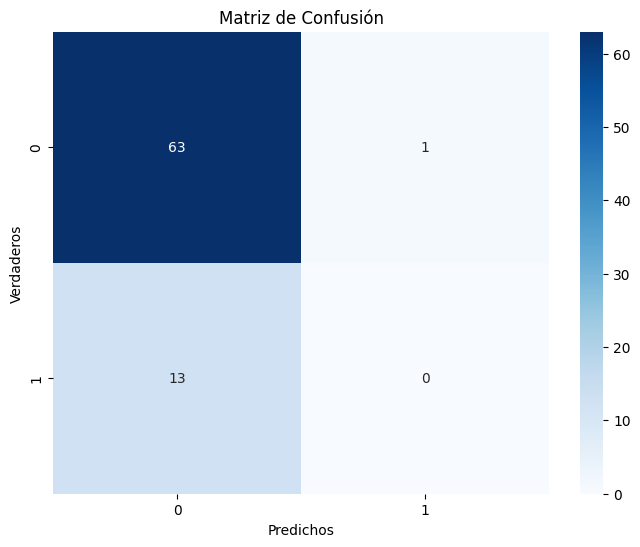

In [20]:
plot_confusion_matrix(y_test, y_predict_lr, 'Matriz de confusion para regresión logística')
get_metrics(y_test, y_predict_lr, 'Regresión Logística')

### Árboles de decisión

In [21]:
DecisionTreeClassifierModel = DecisionTreeClassifier().fit(X_train_scaled, y_train)

In [22]:
y_predict_td = DecisionTreeClassifierModel.predict(X_test_scaled)

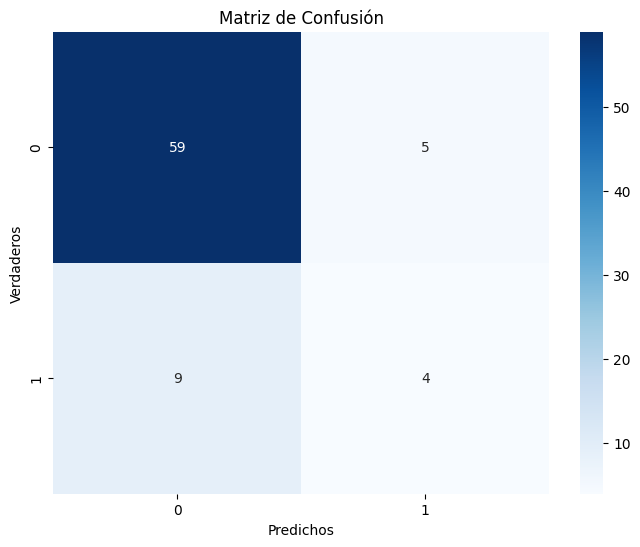

In [23]:
plot_confusion_matrix(y_test, y_predict_td, 'Matriz de confusion para árboles de decisión')
get_metrics(y_test, y_predict_td, 'Árbol Decisión')

### K Vecinos mas Cercanos - KNN

In [24]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors=2).fit(X_train_scaled, y_train)

In [25]:
y_predict_knn = KNNClassifierModel.predict(X_test_scaled)

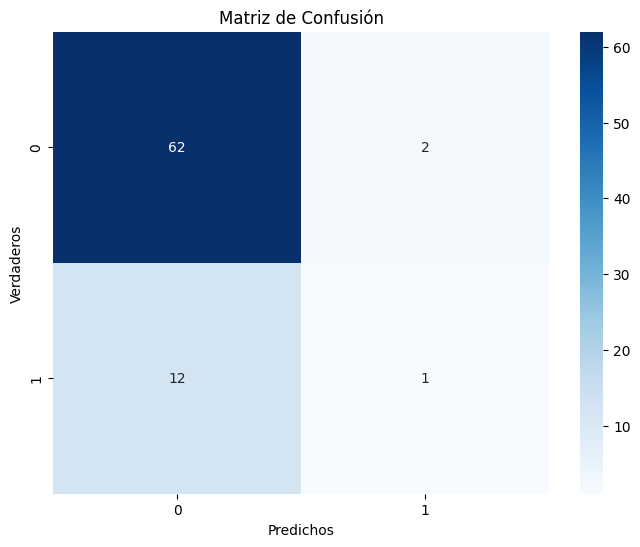

In [26]:
plot_confusion_matrix(y_test, y_predict_knn, 'Matriz de confusion para vecinos mas cercanos')
get_metrics(y_test, y_predict_knn, 'Vecinos Cercanos')

### Máquina de soporte vectorial - SVM

In [27]:
SVMClassifierModel = SVC(kernel='rbf', C=10, gamma='scale').fit(X_train_scaled, y_train)

In [28]:
y_pred_svm = SVMClassifierModel.predict(X_test_scaled)

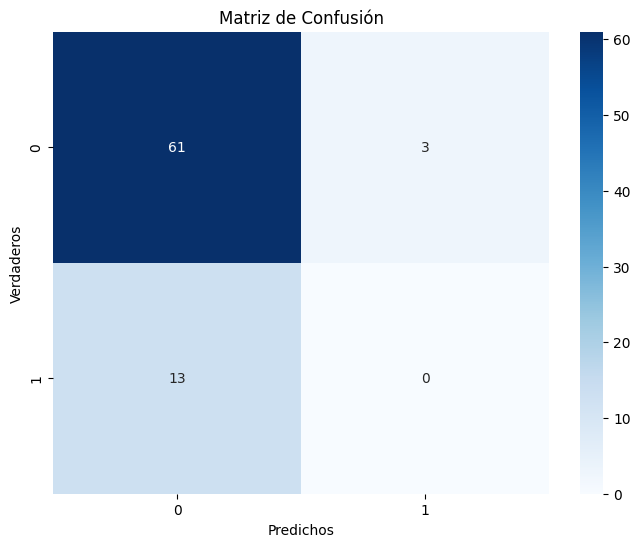

In [29]:
plot_confusion_matrix(y_test, y_pred_svm, 'Matriz de confusion para maquina de soporte vectorial')
get_metrics(y_test, y_pred_svm, 'Máquina de Soporte Vectorial')

### Bosque aleatorio - Random Forest

In [30]:
RandomForestClassifier = RandomForestClassifier(n_estimators=3000).fit(X_train_scaled, y_train)

In [31]:
y_pred_rf = RandomForestClassifier.predict(X_test_scaled)

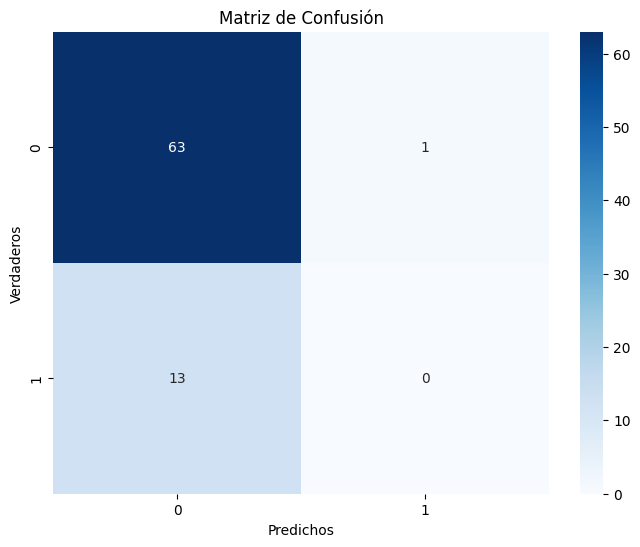

In [32]:
plot_confusion_matrix(y_test, y_pred_rf, 'Matriz de confusion para bosque aleatorio.')
get_metrics(y_test, y_pred_rf, 'Bosque Aleatorio')

### Red Neuronal - NN

In [33]:
y_train_categorical = to_categorical(y_train, num_classes=2) 
y_test_categorical = to_categorical(y_test, num_classes=2)

In [34]:
NN_Model = Sequential()
NN_Model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
NN_Model.add(Dropout(0.5))
NN_Model.add(Dense(32, activation='relu'))
NN_Model.add(Dropout(0.25))
NN_Model.add(Dense(2, activation='softmax'))
#NN_Model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [35]:
NN_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
NN_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,450 (17.38 KB)

 Trainable params: 4,450 (17.38 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
Data = NN_Model.fit(X_train_scaled, y_train_categorical, epochs=40, batch_size=32, validation_data=(X_test_scaled, y_test_categorical))

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4731 - loss: 0.8284 - val_accuracy: 0.6753 - val_loss: 0.6890
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - loss: 0.7001 - val_accuracy: 0.8312 - val_loss: 0.5689
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7652 - loss: 0.6057 - val_accuracy: 0.8312 - val_loss: 0.5126
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7625 - loss: 0.5839 - val_accuracy: 0.8312 - val_loss: 0.4836
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.5628 - val_accuracy: 0.8312 - val_loss: 0.4677
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7891 - loss: 0.5743 - val_accuracy: 0.8312 - val_loss: 0.4602
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.5167 - val_accuracy: 0.8312 - val_loss: 0.4552
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8096 - loss: 0.5253 - val_accuracy: 0.8312 - val_loss:

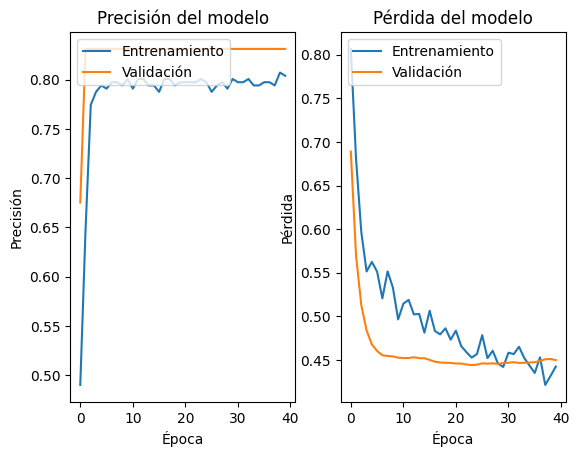

In [38]:
plot_data_NN(Data)

In [39]:
y_predict = NN_Model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [40]:
y_predict = np.argmax(y_predict, axis=1)

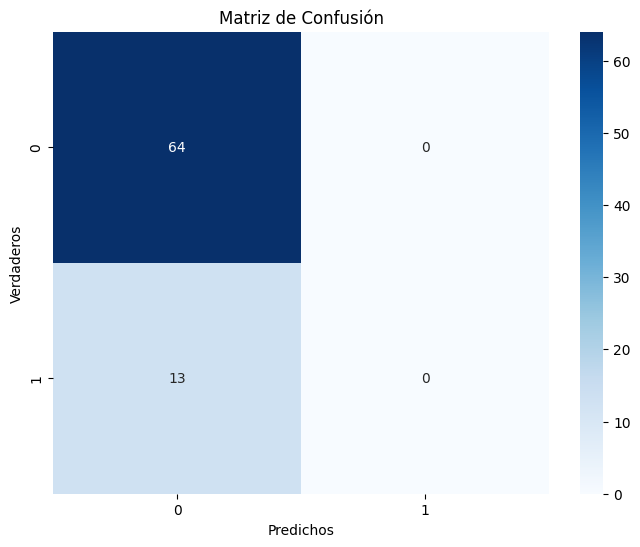

In [41]:
plot_confusion_matrix(y_test, y_predict, 'Matriz de confusion para red neuronal')
get_metrics(y_test, y_predict, 'Red Neuronal')

## Aplicar sobremuestreo para balancear las clases

In [42]:
baby_healthy = final_dataframe[final_dataframe['babyhealth'] == 0]
baby_no_healthy = final_dataframe[final_dataframe['babyhealth'] == 1]
print('baby_healthy:', baby_healthy.shape, 'baby_no_healthy:', baby_no_healthy.shape)

baby_healthy: (308, 25) baby_no_healthy: (75, 25)


In [43]:
oversampled_no_healthy = baby_no_healthy.sample(n=308, replace=True)
oversampling_dataframe = pd.concat([baby_healthy, oversampled_no_healthy])

In [44]:
X, Y = oversampling_dataframe.drop('babyhealth',axis=1), oversampling_dataframe['babyhealth']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print('Total records in signal X_train set: {}'.format(len(X_train)))
print('Total records in signal X_test set: {}'.format(len(X_test)))
print('Total records in signal Y_train set: {}'.format(len(y_train)))
print('Total records in signal Y_test set: {}'.format(len(y_test)))

Total records in signal X_train set: 492
Total records in signal X_test set: 124
Total records in signal Y_train set: 492
Total records in signal Y_test set: 124


In [45]:
print('Total Healthy: ', oversampling_dataframe[oversampling_dataframe['babyhealth'] == 0].shape[0], '\nTotal No Healthy: ',oversampling_dataframe[oversampling_dataframe['babyhealth'] == 1].shape[0])

Total Healthy:  308 
Total No Healthy:  308


In [46]:
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

In [47]:
X_train_coded_oversampled = pd.get_dummies(X_train, columns=['sex', 'diabetes', 'hypertension', 'preeclampsia', 'pyrexia', 'meconium', 'noprogress', 'rectype', 'error_in_min_fhr', 'error_in_min_uc'])
X_test_coded_oversampled = pd.get_dummies(X_test, columns=['sex', 'diabetes', 'hypertension', 'preeclampsia', 'pyrexia', 'meconium', 'noprogress', 'rectype', 'error_in_min_fhr', 'error_in_min_uc'])
scaler = StandardScaler()
X_train_scaled_oversampled = scaler.fit_transform(X_train_coded_oversampled)
X_test_scaled_oversampled = scaler.transform(X_test_coded_oversampled)

In [48]:
NN_Model_Oversampled = Sequential()
NN_Model_Oversampled.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
NN_Model_Oversampled.add(Dropout(0.5))
NN_Model_Oversampled.add(Dense(32, activation='relu'))
NN_Model_Oversampled.add(Dropout(0.25))
NN_Model_Oversampled.add(Dense(2, activation='softmax'))
NN_Model_Oversampled.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [49]:
NN_Model_Oversampled.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
Data_Oversampled = NN_Model.fit(X_train_scaled_oversampled, y_train_categorical, epochs=40, batch_size=32, validation_data=(X_test_scaled_oversampled, y_test_categorical))

Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4929 - loss: 0.8770 - val_accuracy: 0.6210 - val_loss: 0.5609
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5425 - loss: 0.6891 - val_accuracy: 0.7258 - val_loss: 0.5503
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6105 - loss: 0.6371 - val_accuracy: 0.7742 - val_loss: 0.5604
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6245 - loss: 0.6495 - val_accuracy: 0.7823 - val_loss: 0.5579
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6584 - loss: 0.6071 - val_accuracy: 0.7823 - val_loss: 0.5430
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6799 - loss: 0.6054 - val_accuracy: 0.7903 - val_loss: 0.5357
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6377 - loss: 0.5925 - val_accuracy: 0.8145 - val_loss: 0.5289
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6736 - loss: 0.5909 - val_accuracy: 0.8306 - val_loss:

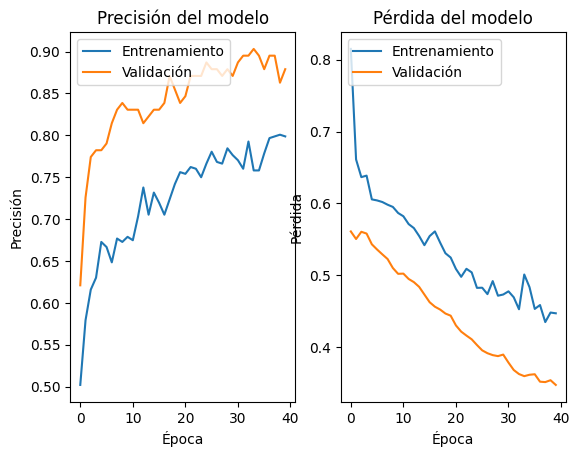

In [52]:
plot_data_NN(Data_Oversampled)

In [69]:
y_predict_oversampled = NN_Model.predict(X_test_scaled_oversampled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step


In [70]:
y_predict_oversampled = np.argmax(y_predict_oversampled, axis=1)

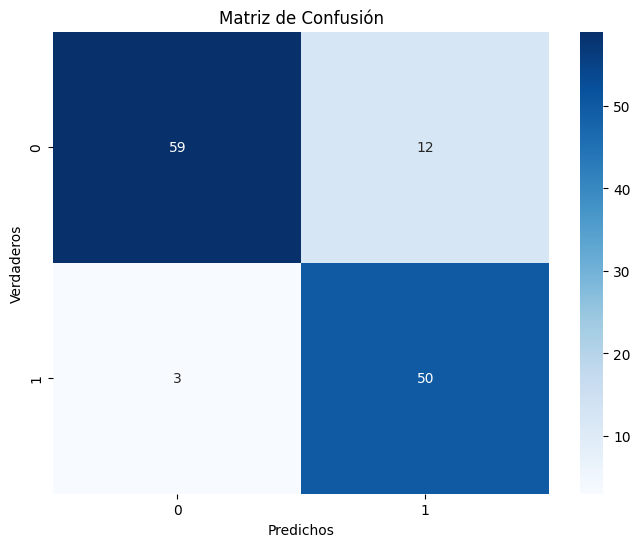

In [73]:
plot_confusion_matrix(y_test, y_predict_oversampled, 'Matriz de confusion para red neuronal sobremuestreada')
get_metrics(y_test, y_predict_oversampled, 'Red Neuronal Sobremuestreada')